2025-07-06 00:01:27,109 - INFO - 📋 معاينة أول 10 صفوف:
2025-07-06 00:01:27,116 - INFO - 
   id    species   color  petal_length_cm  petal_width_cm  freshness_days is_fragrant
0   1  Sunflower     Red             6.39            2.79               9         Yes
1   2       Rose    Pink             4.57            1.09              12         Yes
2   3  Sunflower    Pink             5.69            2.53              14         Yes
3   4       Lily  Yellow             5.32            2.69               8          No
4   5  Sunflower  Yellow             7.23            2.69              10          No
5   6       Rose  Orange             4.50            1.93               9         Yes
6   7       Rose    Pink             3.95            2.27               3          No
7   8  Sunflower    Pink             7.17            3.18              10         Yes
8   9     Orchid  Orange             4.68            1.87              10          No
9  10       Rose    Pink             5.02          

✅ شكل البيانات: (1000, 7)
🔍 عدد القيم المفقودة بعد المعالجة: 0
🧪 التحقق من نطاق أول 5 أعمدة رقمية:
id: min=0.00, max=1.00
petal_length_cm: min=0.00, max=1.00
petal_width_cm: min=0.00, max=1.00
freshness_days: min=0.00, max=1.00


C:\Users\PC\AppData\Local\Temp\ipykernel_31652\2134452760.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\PC\PycharmProjects\PythonProject10\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


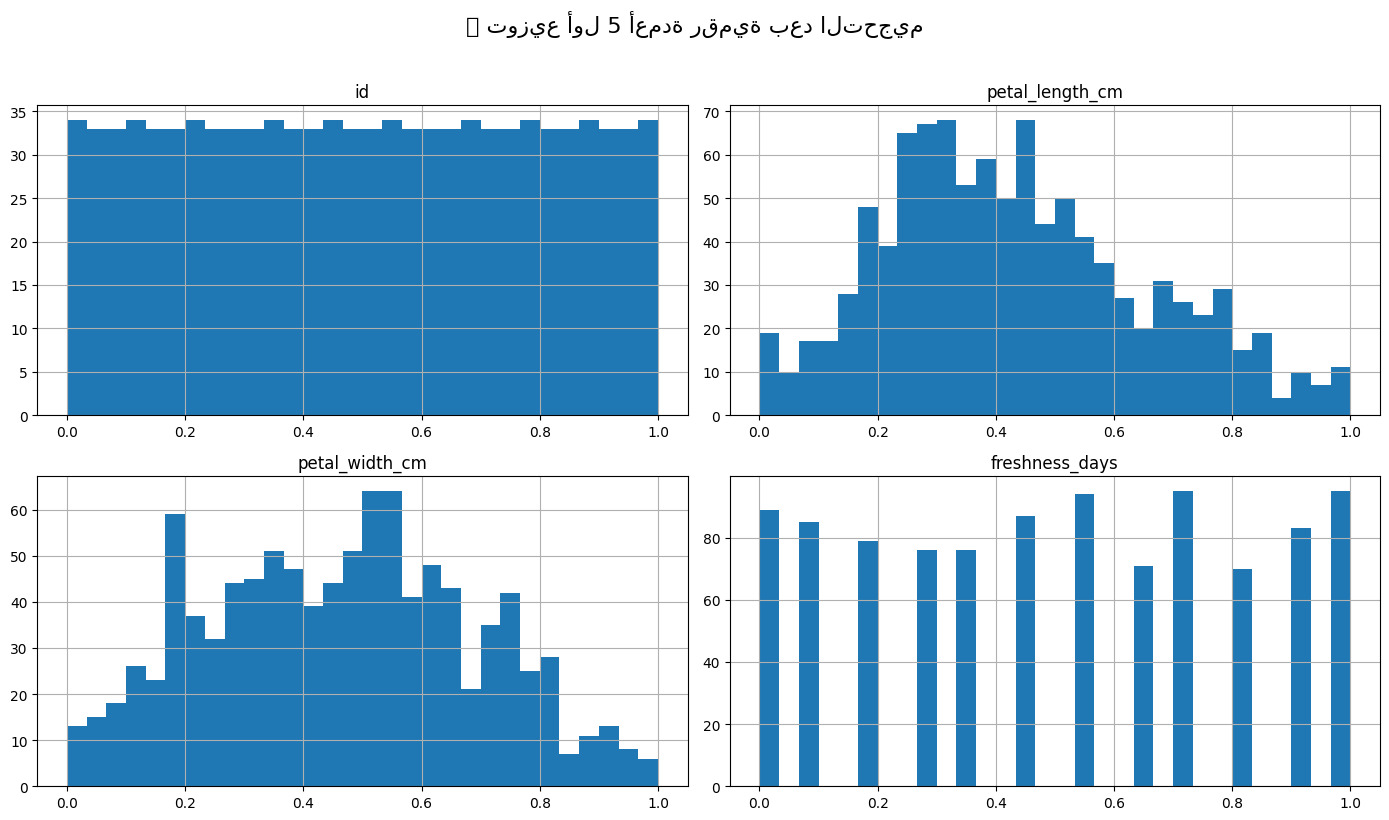

[✓] تم حفظ البيانات في: c:\Users\PC\PycharmProjects\PythonProject10\data_intelligence_system\data\processed\clean_data_transformed.csv


In [1]:
# ============================
# 🧼 Data Cleaning Experiments
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pathlib import Path
import sys

# ======================
# 🧩 استيراد معاينة البيانات والتحقق
# ======================
try:
    project_root = Path(__file__).resolve().parents[1]
except NameError:
    project_root = Path.cwd().parents[1]

sys.path.append(str(project_root / "data_intelligence_system"))

from data.processed.clean_preview import preview
from data.processed.validate_clean_data import validate  # ✅ مضاف حديثًا


# ======================
# 📂 تحميل البيانات
# ======================

def load_data():
    data_path = project_root / "data_intelligence_system" / "data" / "processed" / "clean_data.csv"
    if not data_path.exists():
        print(f"❌ الملف غير موجود: {data_path}")
        return None, project_root
    df = pd.read_csv(data_path)
    print(f"✅ شكل البيانات: {df.shape}")
    preview(df)
    try:
        validate(df)  # ✅ التحقق من الجودة
    except Exception as e:
        print(f"⚠️ فشل التحقق من البيانات: {e}")
    return df, project_root


# ==========================
# 📉 التعامل مع القيم المفقودة
# ==========================

def handle_missing_values(df):
    for col in df.select_dtypes(include=np.number).columns:
        df[col] = df[col].fillna(df[col].mean())

    for col in df.select_dtypes(include='object').columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].mode()[0])

    print(f"🔍 عدد القيم المفقودة بعد المعالجة: {df.isnull().sum().sum()}")
    return df


# =====================
# 🧱 توحيد أسماء الأعمدة
# =====================

def standardize_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    return df


# =====================
# 🔠 ترميز الأعمدة النوعية
# =====================

def encode_categorical_columns(df):
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df


# ======================
# 📊 موازنة القيم الرقمية
# ======================

def scale_numeric_columns(df):
    num_cols = df.select_dtypes(include=np.number).columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df, num_cols


# ======================
# ✅ التحقق من الجودة
# ======================

def check_quality(df, num_cols):
    print("🧪 التحقق من نطاق أول 5 أعمدة رقمية:")
    for col in num_cols[:5]:
        print(f"{col}: min={df[col].min():.2f}, max={df[col].max():.2f}")


# ========================
# 📈 رسم التوزيعات الرقمية
# ========================

def plot_distributions(df, num_cols):
    df[num_cols[:5]].hist(figsize=(14, 8), bins=30)
    plt.suptitle("📊 توزيع أول 5 أعمدة رقمية بعد التحجيم", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


# ========================
# 💾 حفظ البيانات النظيفة
# ========================

def save_clean_data(df, project_root):
    output_path = project_root / "data_intelligence_system" / "data" / "processed" / "clean_data_transformed.csv"
    df.to_csv(output_path, index=False)
    print(f"[✓] تم حفظ البيانات في: {output_path}")


# ========================
# 🚀 نقطة تشغيل السكربت
# ========================

if __name__ == "__main__":
    df, root = load_data()
    if df is not None:
        df = handle_missing_values(df)
        df = standardize_column_names(df)
        df = encode_categorical_columns(df)
        df, num_cols = scale_numeric_columns(df)
        check_quality(df, num_cols)
        plot_distributions(df, num_cols)
        save_clean_data(df, root)
